In [1]:
#!pip install --user sklearn

In [2]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples,silhouette_score

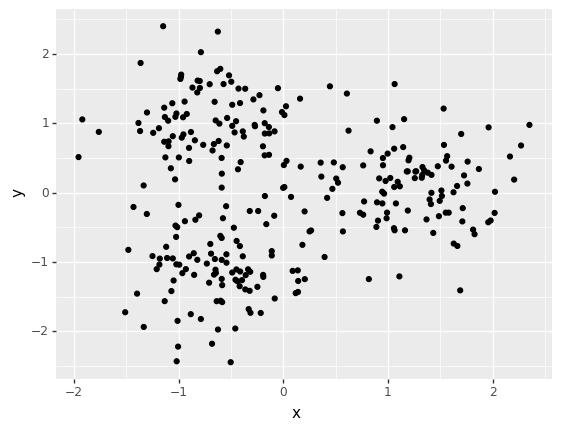

<ggplot: (15286953)>

In [3]:
n_samples = 1500
dataset1 = make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0],columns = ["x", "y"])
dataset2 = make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0], columns = ["x", "y"])

dataset3 = make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0],columns = ["x", "y"])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0],columns = ["x", "y"])

dataset5= pd.read_csv("dataset5.csv")
dataset6= pd.read_csv("dataset6.csv")
dataset7= pd.read_csv("dataset7.csv")
dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")
datasets=[dataset1]
z = StandardScaler()
dataset6[["x","y"]] = z.fit_transform(dataset6)
ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 


1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

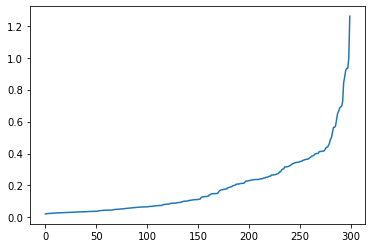

In [4]:
mins = 3
nn = NearestNeighbors(n_neighbors=4)

nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)


# dataset1

In [5]:
dataset1.head()

,x,y
0,-0.432797,0.100713
1,-0.798724,0.665323
2,0.938113,0.110007
3,-0.207417,-1.041097
4,-0.068075,-0.933842


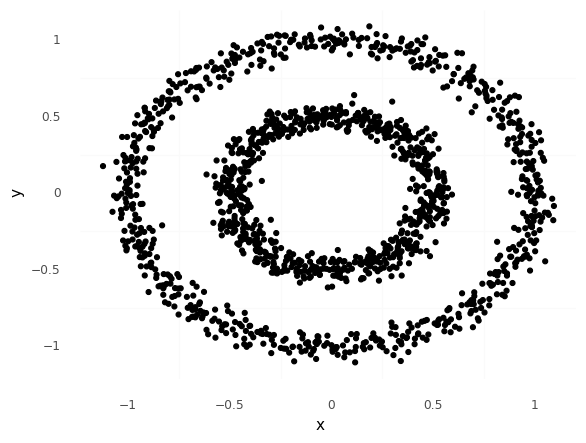

<ggplot: (20388226)>

In [6]:
ggplot(dataset1[['x','y']], aes(x = "x", y = "y" )) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=["x","y"]) + theme(panel_grid_major = element_blank()) \



In [7]:
Agglom = AgglomerativeClustering(2)
km = KMeans(2)
db = DBSCAN(eps= 0.1, min_samples= 9)
print(dataset2.columns)

Index(['x', 'y'], dtype='object')


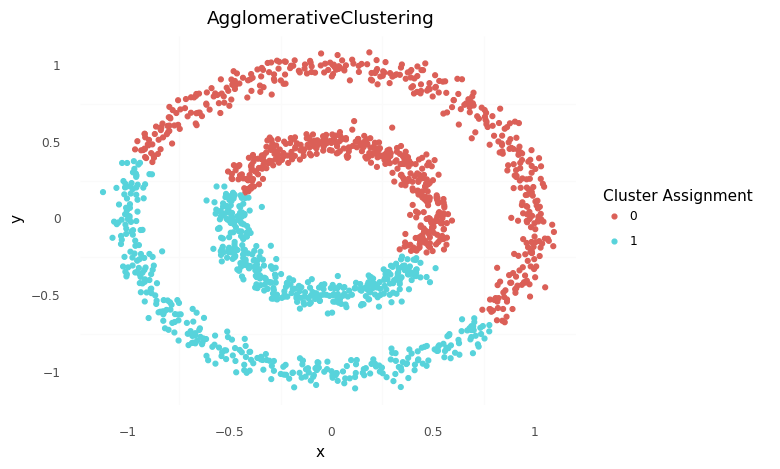

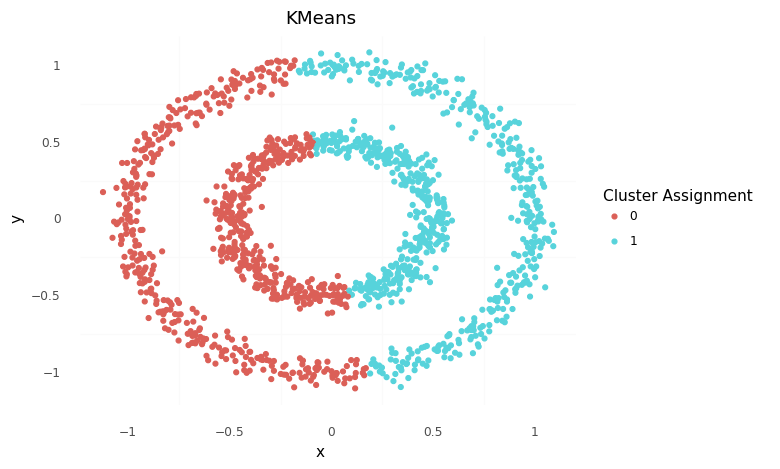

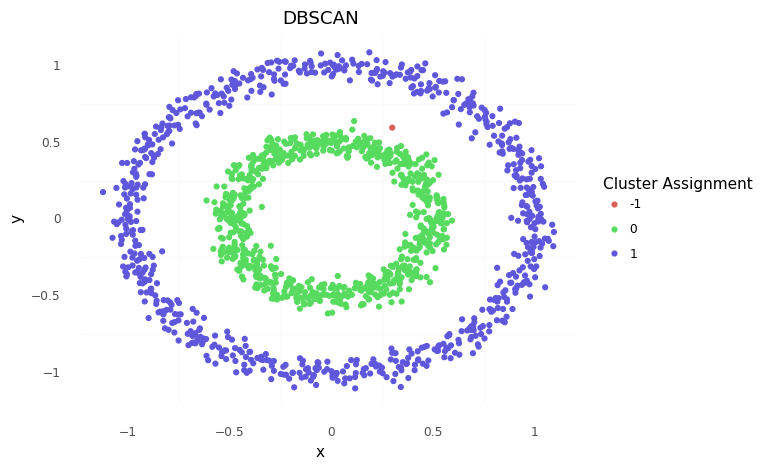

In [8]:
Agglom.fit(dataset1)
km.fit(dataset1)
db.fit(dataset1)

dataset1['Agglom'] = Agglom.labels_
dataset1['km'] = km.labels_
dataset1['db'] = db.labels_


print(ggplot(dataset1, aes(x='x', y='y',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset1, aes(x='x', y='y',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset1, aes(x='x', y='y',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [9]:
print("DBSCAN score")
d1_clustered =  dataset1.loc[dataset1.db>=0]
print(silhouette_score(d1_clustered[['x', 'y']], d1_clustered["db"]))
print("KMeans score")
d1_clustered =  dataset1.loc[dataset1.km>=0]
print(silhouette_score(d1_clustered[['x', 'y']], d1_clustered["km"]))
print("Agglom score")
d1_clustered =  dataset1.loc[dataset1.Agglom>=0]
print(silhouette_score(d1_clustered[['x', 'y']], d1_clustered["Agglom"]))


DBSCAN score
0.11389607637708528
KMeans score
0.3530190419072872
Agglom score
0.35031193004969047


### the best cluster technique here is DBSCAN however it has the lowest silhouette_score

# dataset 2

In [10]:
Agglom = AgglomerativeClustering(2)
km = KMeans(2)
db = DBSCAN(eps= 0.1, min_samples= 9)
print(dataset2.columns)

Index(['x', 'y'], dtype='object')


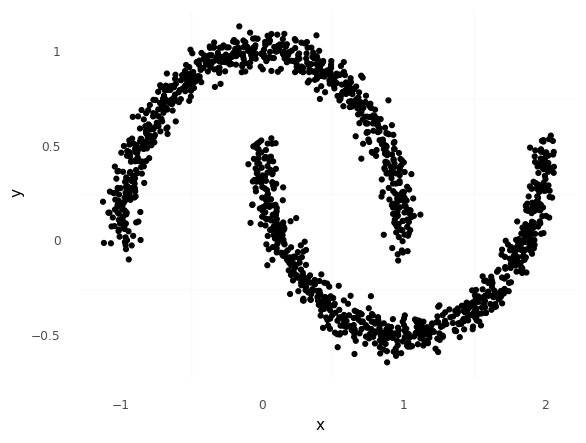

<ggplot: (24224437)>

In [11]:
ggplot(dataset2[['x','y']], aes(x = "x", y = "y" )) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=["x","y"]) + theme(panel_grid_major = element_blank()) \



In [12]:
dataset2.head()


,x,y
0,0.801706,-0.475135
1,1.794314,-0.127497
2,-0.022420,0.463975
3,-0.310068,0.996121
4,2.043817,0.558811


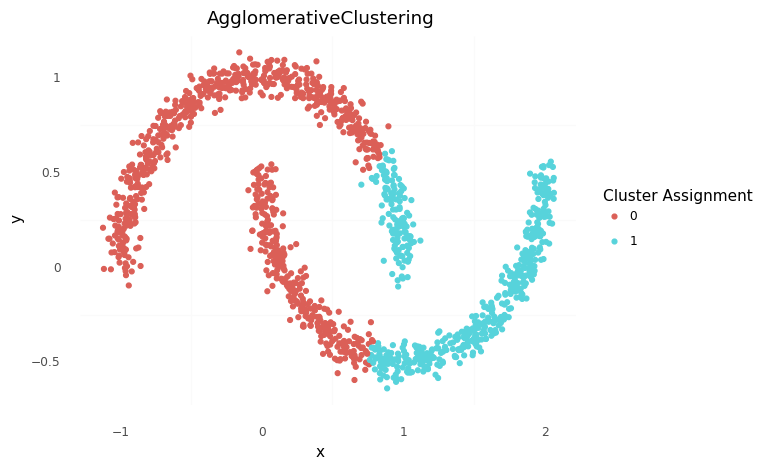

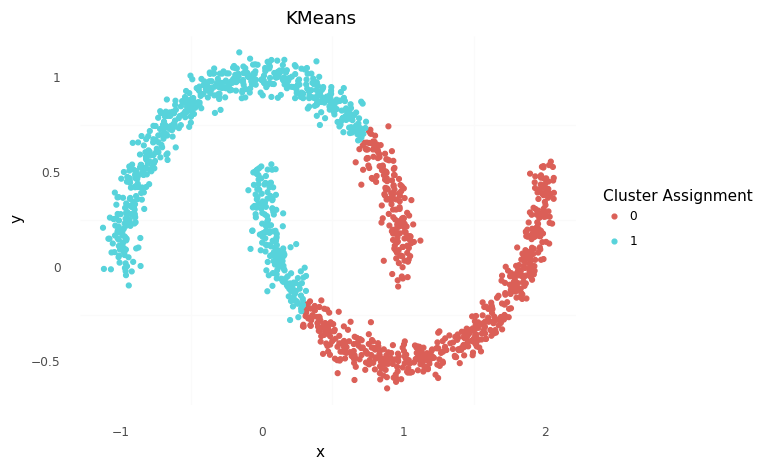

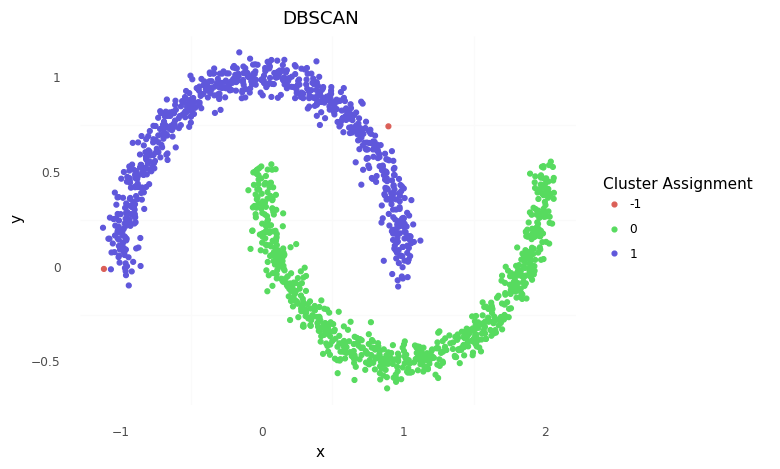

In [13]:
Agglom.fit(dataset2)
km.fit(dataset2)
db.fit(dataset2)

dataset2['Agglom'] = Agglom.labels_
dataset2['km'] = km.labels_
dataset2['db'] = db.labels_


print(ggplot(dataset2, aes(x='x', y='y',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset2, aes(x='x', y='y',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset2, aes(x='x', y='y',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [14]:
print("DBSCAN score")
d2_clustered =  dataset2.loc[dataset2.db>=0]
print(silhouette_score(d2_clustered[['x', 'y']], d2_clustered["db"]))
print("KMeans score")
d2_clustered =  dataset2.loc[dataset2.km>=0]
print(silhouette_score(d2_clustered[['x', 'y']], d2_clustered["km"]))
print("Agglom score")
d2_clustered =  dataset2.loc[dataset2.Agglom>=0]
print(silhouette_score(d2_clustered[['x', 'y']], d2_clustered["Agglom"]))


DBSCAN score
0.33367911719063614
KMeans score
0.4931521674878671
Agglom score
0.4564739105543649


#### the best cluster technique here is DBSCAN however it has the lowest silhouette_score

# dataset 3

In [15]:
Agglom = AgglomerativeClustering(3)
km = KMeans(3)
db = DBSCAN(eps= 0.6, min_samples= 9)
print(dataset2.columns)

Index(['x', 'y', 'Agglom', 'km', 'db'], dtype='object')


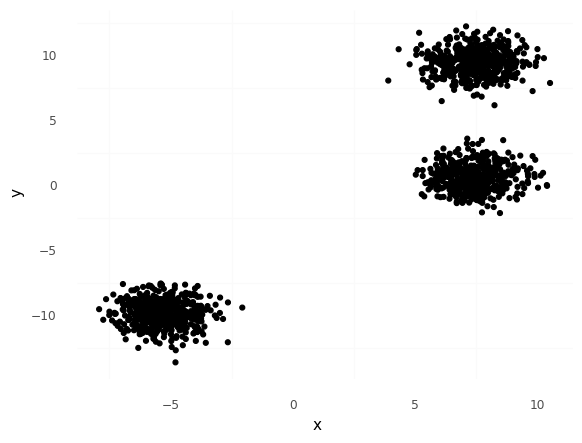

<ggplot: (24250353)>

In [16]:
ggplot(dataset3[['x','y']], aes(x = "x", y = "y" )) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=["x","y"]) + theme(panel_grid_major = element_blank()) \



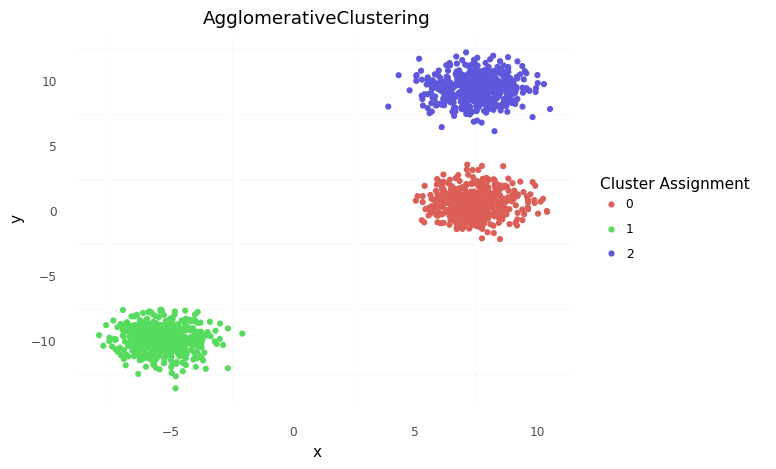

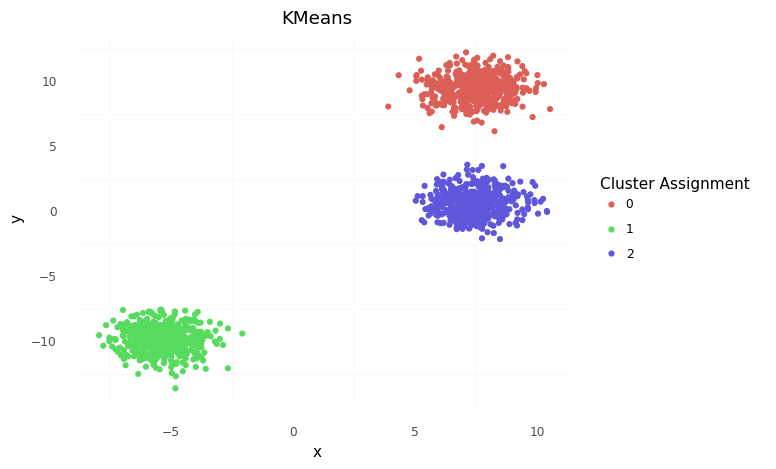

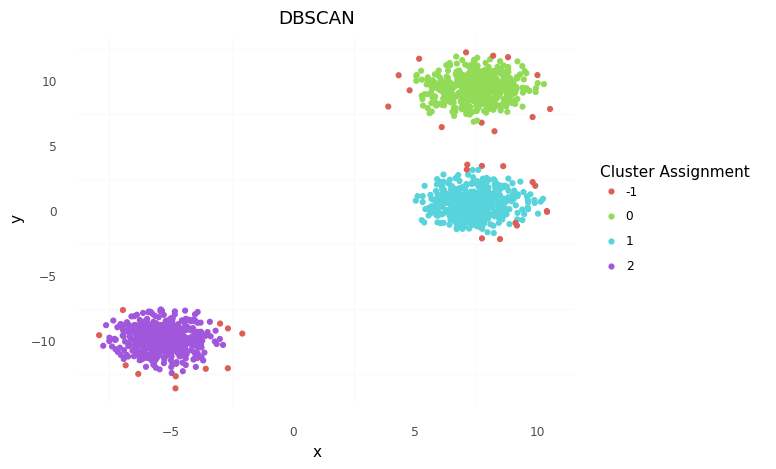

In [17]:
Agglom.fit(dataset3)
km.fit(dataset3)
db.fit(dataset3)

dataset3['Agglom'] = Agglom.labels_
dataset3['km'] = km.labels_
dataset3['db'] = db.labels_


print(ggplot(dataset3, aes(x='x', y='y',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset3, aes(x='x', y='y',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset3, aes(x='x', y='y',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [18]:
print("DBSCAN score")
d_clustered =  dataset3.loc[dataset3.db>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["db"]))
print("KMeans score")
d_clustered =  dataset3.loc[dataset3.km>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["km"]))
print("Agglom score")
d_clustered =  dataset3.loc[dataset3.Agglom>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["Agglom"]))


DBSCAN score
0.8360633094305323
KMeans score
0.8290743874701529
Agglom score
0.8290743874701529


### KMeans is good here as the data is cocentrated and in the shape of circles

# dataset 4

In [19]:
Agglom = AgglomerativeClustering(2)
km = KMeans(2)
db = DBSCAN(eps= 0.5, min_samples= 9)
print(dataset2.columns)

Index(['x', 'y', 'Agglom', 'km', 'db'], dtype='object')


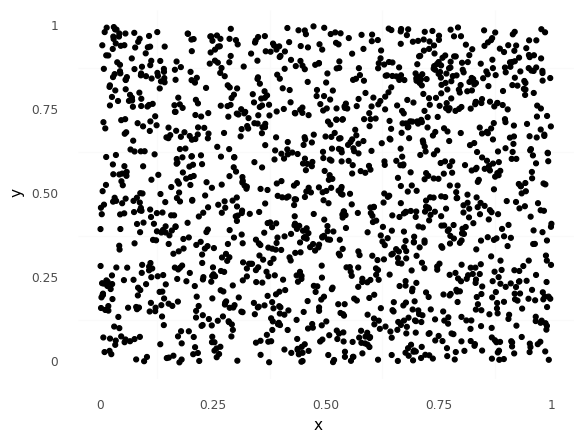

<ggplot: (20376546)>

In [20]:
ggplot(dataset4[['x','y']], aes(x = "x", y = "y" )) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=["x","y"]) + theme(panel_grid_major = element_blank()) \



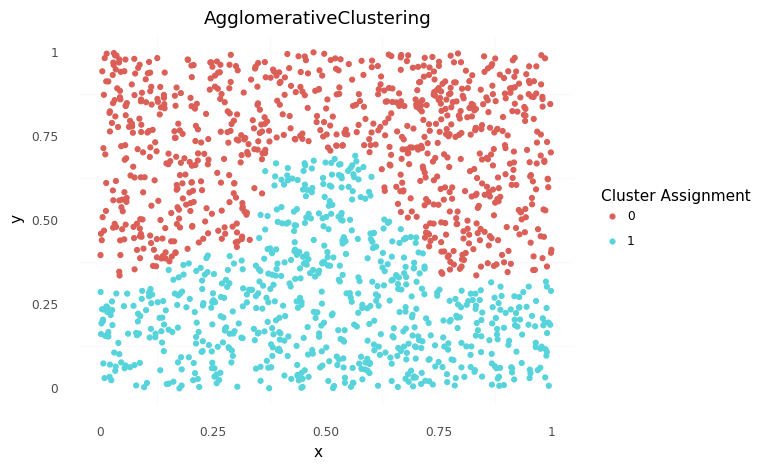

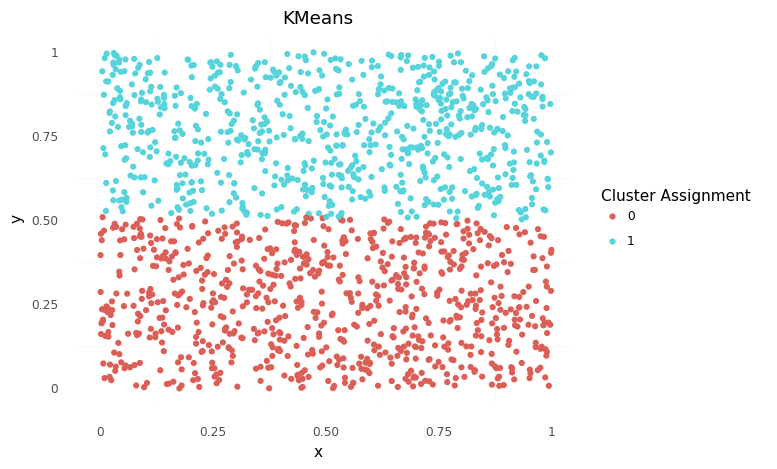

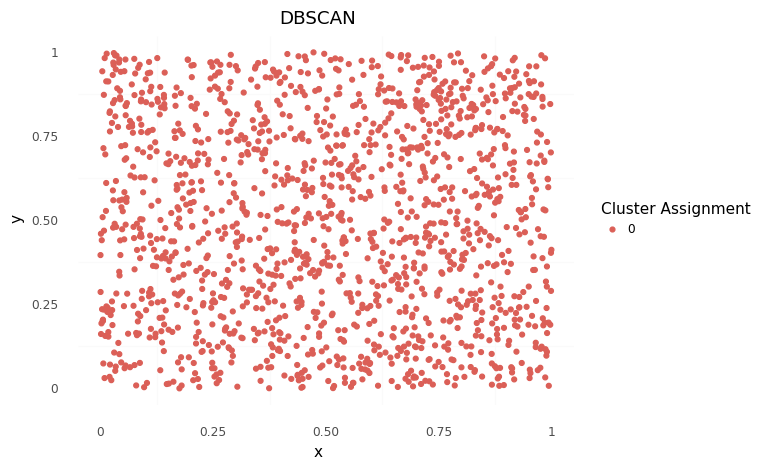

In [21]:
Agglom.fit(dataset4)
km.fit(dataset4)
db.fit(dataset4)

dataset4['Agglom'] = Agglom.labels_
dataset4['km'] = km.labels_
dataset4['db'] = db.labels_


print(ggplot(dataset4, aes(x='x', y='y',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset4, aes(x='x', y='y',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset4, aes(x='x', y='y',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [22]:
print("DBSCAN score")
d_clustered =  dataset4.loc[dataset4.db>=0]
#print(silhouette_score(dataset4[['x', 'y']], dataset4["db"]))
print("KMeans score")
d_clustered =  dataset4.loc[dataset4.km>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["km"]))
print("Agglom score")
d_clustered =  dataset4.loc[dataset4.Agglom>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["Agglom"]))


DBSCAN score
KMeans score
0.3623424605900103
Agglom score
0.29341185559441396


### it seems that data is one cluster so DBSCAN is the best here

# dataset 5

In [23]:
dataset5.head()

,1.206086584,1.847686133
0,0.351919,0.245691
1,1.201688,0.630774
2,0.733710,1.364328
3,1.150745,0.724892
4,0.756780,0.449173


In [73]:
Agglom = AgglomerativeClustering(2)
km = KMeans(2)
db = DBSCAN(eps= 0.5, min_samples= 15)
print(dataset2.columns)

Index(['x', 'y', 'Agglom', 'km', 'db'], dtype='object')


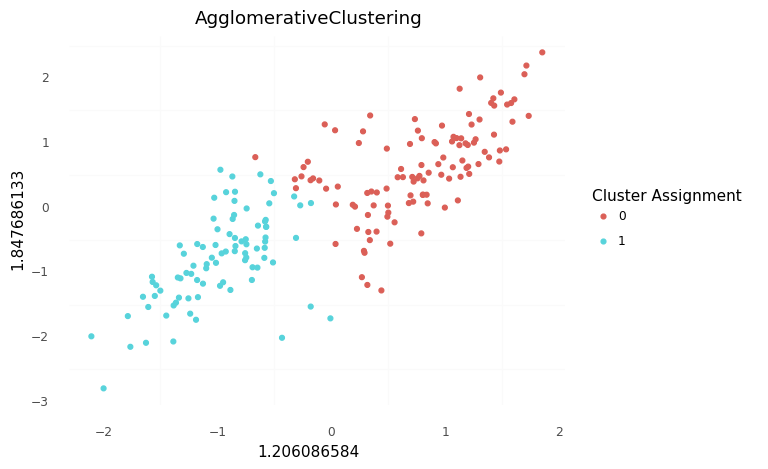

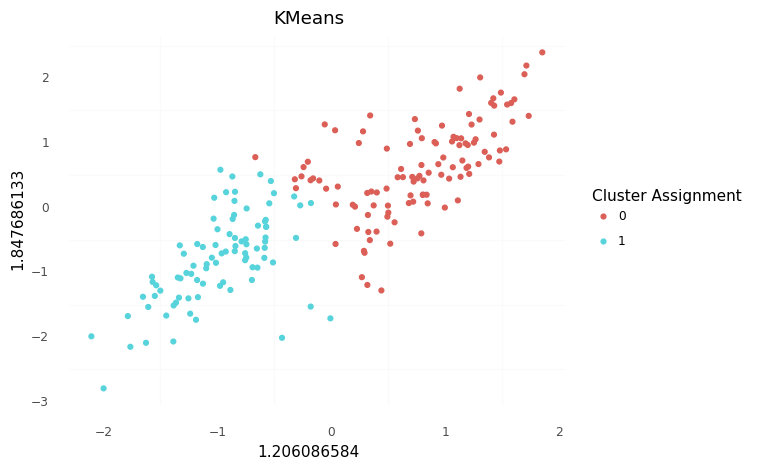

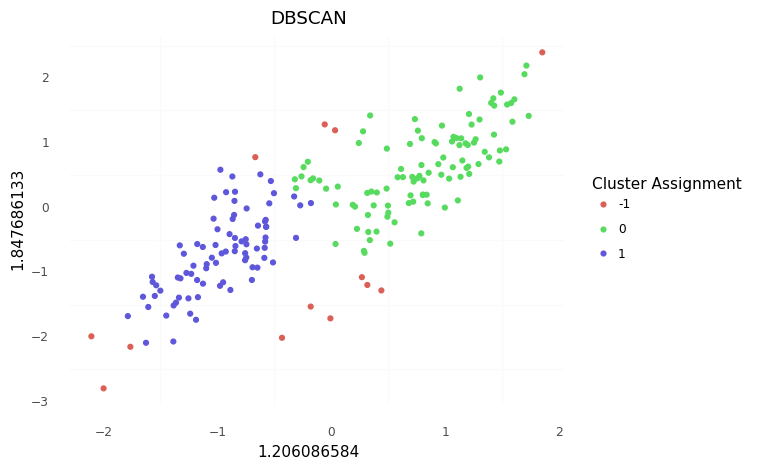

In [74]:
Agglom.fit(dataset5)
km.fit(dataset5)
db.fit(dataset5)

dataset5['Agglom'] = Agglom.labels_
dataset5['km'] = km.labels_
dataset5['db'] = db.labels_


print(ggplot(dataset5, aes(x='1.206086584', y='1.847686133',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset5, aes(x='1.206086584', y='1.847686133',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset5, aes(x='1.206086584', y='1.847686133',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [75]:
print("DBSCAN score")
d_clustered =  dataset5.loc[dataset5.db>=0]
print(silhouette_score(d_clustered[['1.206086584', '1.847686133']], d_clustered["db"]))
print("KMeans score")
d_clustered =  dataset5.loc[dataset5.km>=0]
print(silhouette_score(d_clustered[['1.206086584', '1.847686133']], d_clustered["km"]))
print("Agglom score")
d_clustered =  dataset5.loc[dataset5.Agglom>=0]
print(silhouette_score(d_clustered[['1.206086584', '1.847686133']], d_clustered["Agglom"]))


DBSCAN score
0.5519704642083563
KMeans score
0.5215286128440612
Agglom score
0.5215286128440612


### data not seperated well here so DBSCAN is bad here however hirerichal clustering seems to get better results

# dataset 6

In [27]:
dataset6.head()

,1.578527021,1.408111159,x,y
0,1.748206,0.441915,1.760863,0.448118
1,1.523151,0.681521,1.534861,0.688524
2,1.318949,0.362971,1.329800,0.368909
3,0.977164,-0.373589,0.986577,-0.370113
4,1.065915,-0.159822,1.075702,-0.155631


In [82]:
Agglom = AgglomerativeClustering(3)
km = KMeans(3)
db = DBSCAN(eps= 0.2, min_samples= 11)
print(dataset2.columns)

Index(['x', 'y', 'Agglom', 'km', 'db'], dtype='object')


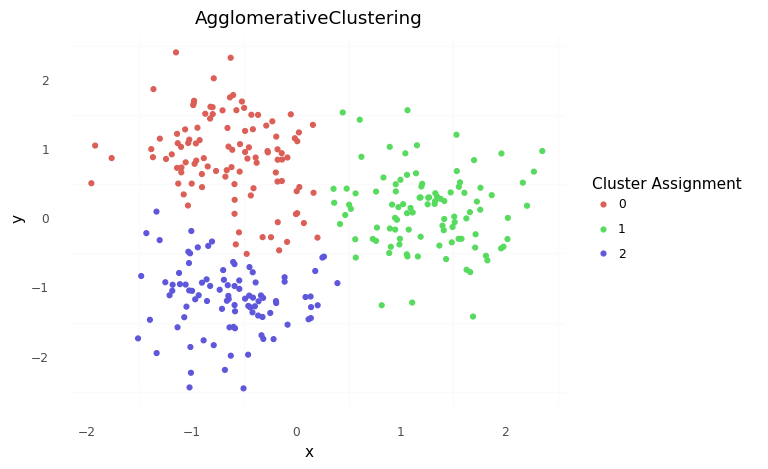

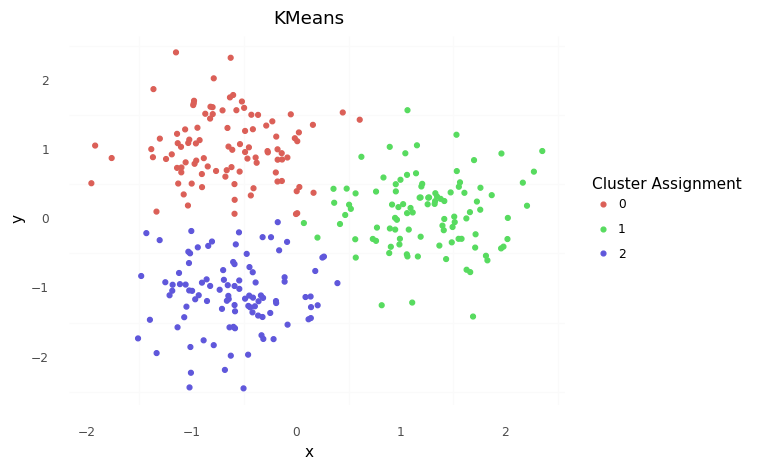

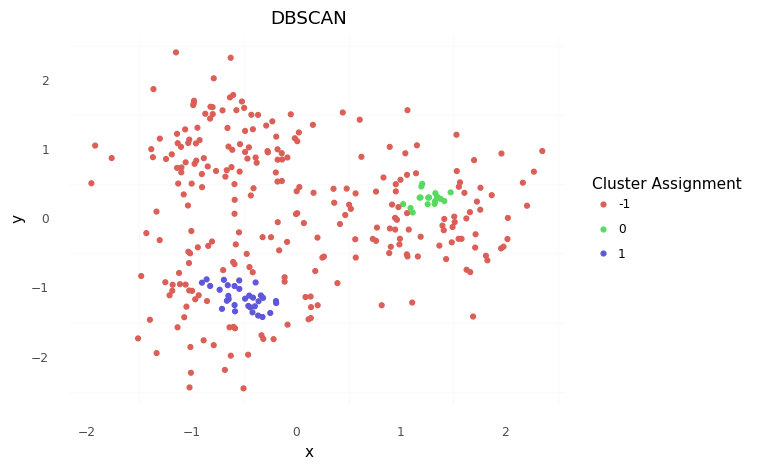

In [83]:
Agglom.fit(dataset6[['x','y']])
km.fit(dataset6[['x','y']])
db.fit(dataset6[['x','y']])

dataset6['Agglom'] = Agglom.labels_
dataset6['km'] = km.labels_
dataset6['db'] = db.labels_


print(ggplot(dataset6, aes(x='x', y='y',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset6, aes(x='x', y='y',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset6, aes(x='x', y='y',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [84]:
print("DBSCAN score")
d_clustered =  dataset6.loc[dataset6.db>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["db"]))
print("KMeans score")
d_clustered =  dataset6.loc[dataset6.km>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["km"]))
print("Agglom score")
d_clustered =  dataset6.loc[dataset6.Agglom>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["Agglom"]))


DBSCAN score
0.8802003824683459
KMeans score
0.55955877574645
Agglom score
0.5341877492082031


### data not seperated well so DBSCAN not the best choice kmeans and hierarichal clustering may be better

# dataset 7

In [44]:
dataset7.head()

,1.332228235,0.178298596,Agglom,km,db
0,1.256056,0.146765,2,1,0
1,1.477661,0.155054,2,1,0
2,1.384840,0.022054,2,1,0
3,1.526956,0.267920,2,1,0
4,1.403152,-0.023382,2,1,0


In [45]:
Agglom = AgglomerativeClustering(3)
km = KMeans(3)
db = DBSCAN(eps= 0.2, min_samples= 9)
print(dataset2.columns)

Index(['x', 'y', 'Agglom', 'km', 'db'], dtype='object')


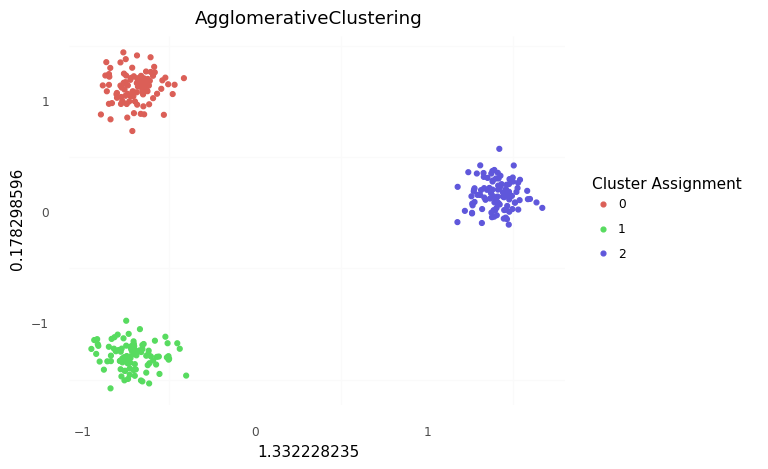

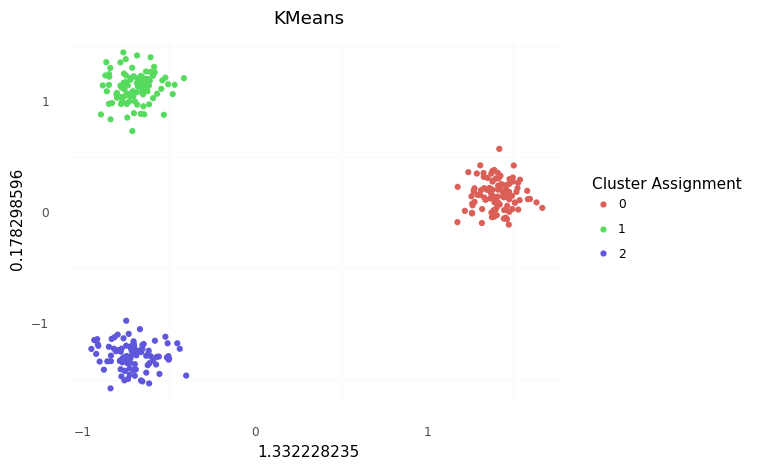

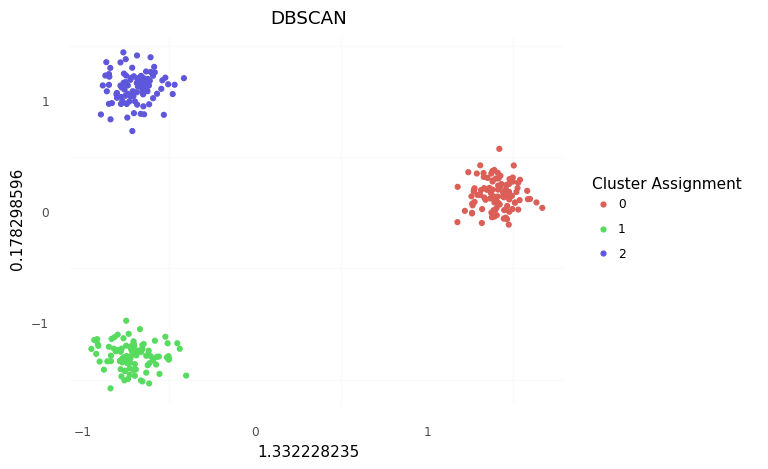

In [46]:
Agglom.fit(dataset7)
km.fit(dataset7)
db.fit(dataset7)

dataset7['Agglom'] = Agglom.labels_
dataset7['km'] = km.labels_
dataset7['db'] = db.labels_


print(ggplot(dataset7, aes(x='1.332228235', y='0.178298596',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset7, aes(x='1.332228235', y='0.178298596',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset7, aes(x='1.332228235', y='0.178298596',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [47]:
print("DBSCAN score")
d_clustered =  dataset7.loc[dataset7.db>=0]
print(silhouette_score(d_clustered[['1.332228235', '0.178298596']], d_clustered["db"]))
print("KMeans score")
d_clustered =  dataset7.loc[dataset7.km>=0]
print(silhouette_score(d_clustered[['1.332228235', '0.178298596']], d_clustered["km"]))
print("Agglom score")
d_clustered =  dataset7.loc[dataset7.Agglom>=0]
print(silhouette_score(d_clustered[['1.332228235', '0.178298596']], d_clustered["Agglom"]))


DBSCAN score
0.9135149174136585
KMeans score
0.9135149174136585
Agglom score
0.9135149174136585


### all clustering techniques seems to be better here

# dataset 8

In [48]:
dataset8.head()

,x,y,Agglom,km,db
0,2.852449,-0.324568,2,2,0
1,2.346342,-0.729224,2,2,0
2,2.229033,-0.599340,2,2,0
3,2.458669,-0.385467,2,2,0
4,2.844177,-0.196813,2,2,0


In [49]:
Agglom = AgglomerativeClustering(3)
km = KMeans(3)
db = DBSCAN(eps= 0.5, min_samples= 9)
print(dataset2.columns)

Index(['x', 'y', 'Agglom', 'km', 'db'], dtype='object')


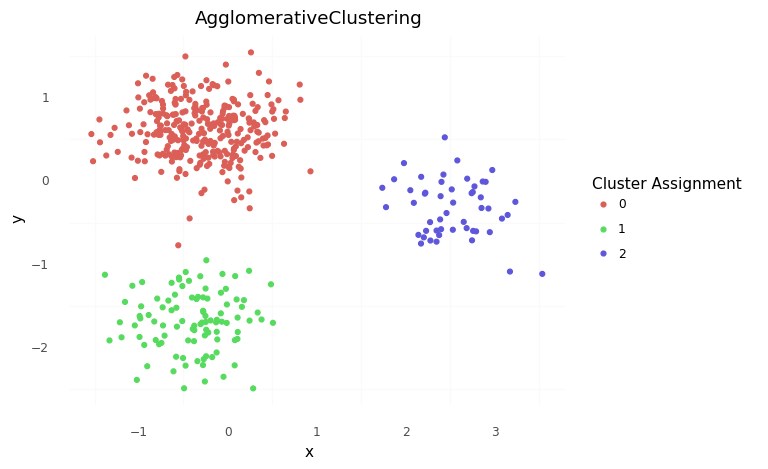

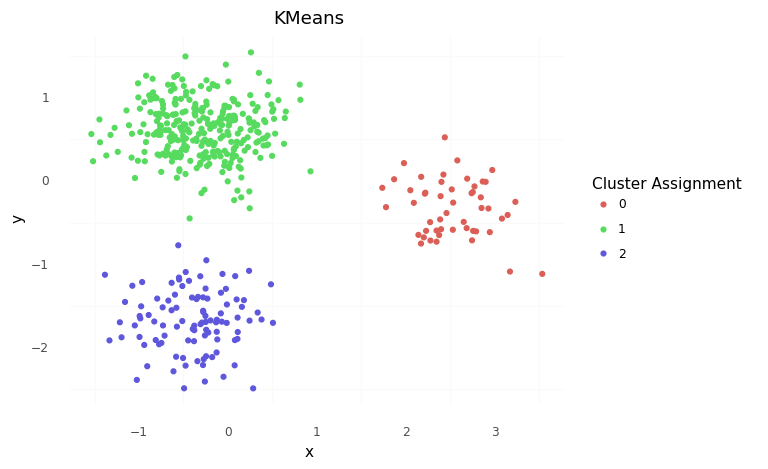

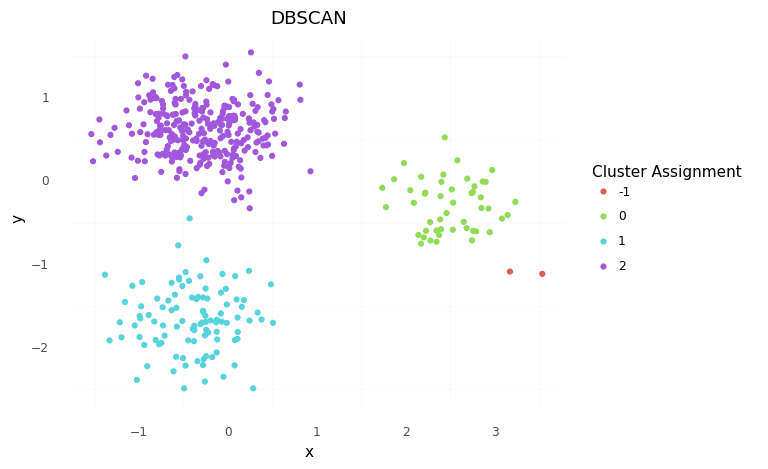

In [50]:
Agglom.fit(dataset8[['x','y']])
km.fit(dataset8[['x','y']])
db.fit(dataset8[['x','y']])

dataset8['Agglom'] = Agglom.labels_
dataset8['km'] = km.labels_
dataset8['db'] = db.labels_


print(ggplot(dataset8, aes(x='x', y='y',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset8, aes(x='x', y='y',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset8, aes(x='x', y='y',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [51]:
print("DBSCAN score")
d_clustered =  dataset8.loc[dataset8.db>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["db"]))
print("KMeans score")
d_clustered =  dataset8.loc[dataset8.km>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["km"]))
print("Agglom score")
d_clustered =  dataset8.loc[dataset8.Agglom>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["Agglom"]))


DBSCAN score
0.7034648896694939
KMeans score
0.7043537508086658
Agglom score
0.7031189213721805


### all clusters seems to be better here as the data is seperated well and in consenterated circles

# dataset 9

In [52]:
dataset9.head()

,x,y,Agglom,km,db
0,0.712520,0.653491,1,0,0
1,0.910914,0.068242,1,0,0
2,0.750752,0.526512,1,0,0
3,0.666605,0.584747,1,0,0
4,0.403062,0.956459,0,0,-1


In [60]:
Agglom = AgglomerativeClustering(2)
km = KMeans(2)
db = DBSCAN(eps= 0.4, min_samples= 9)
print(dataset2.columns)

Index(['x', 'y', 'Agglom', 'km', 'db'], dtype='object')


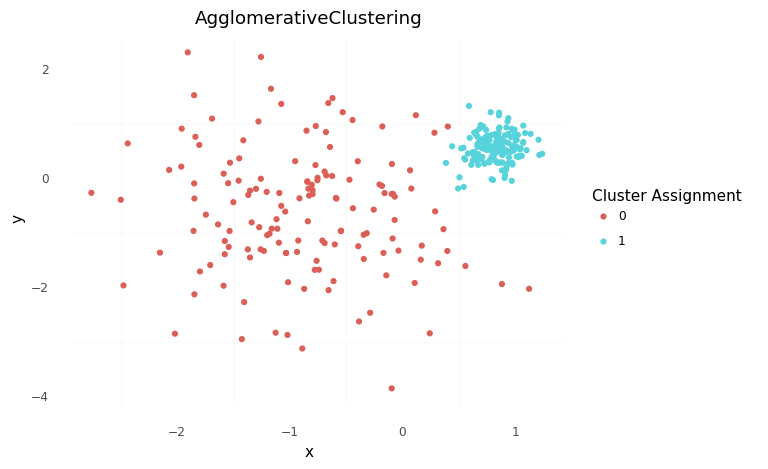

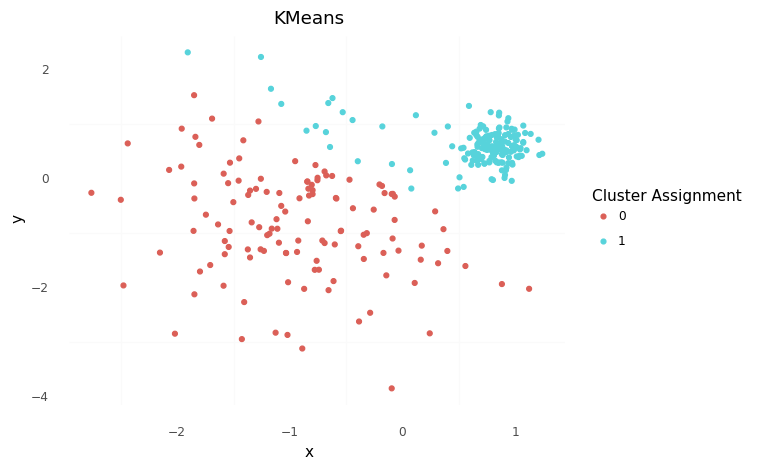

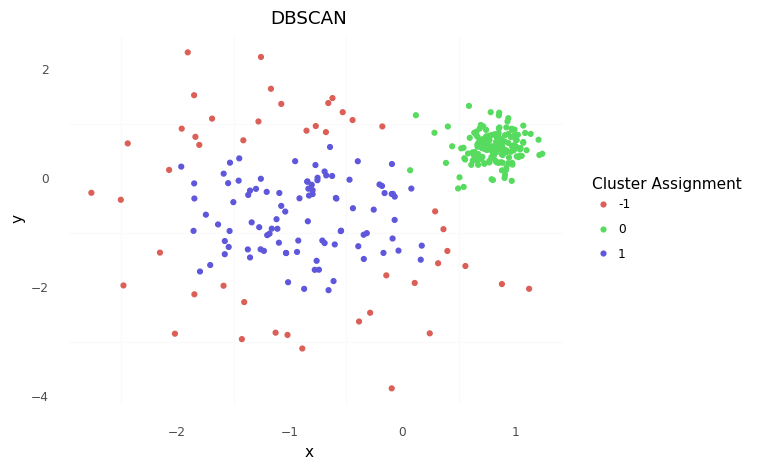

In [61]:
Agglom.fit(dataset9[['x','y']])
km.fit(dataset9[['x','y']])
db.fit(dataset9[['x','y']])

dataset9['Agglom'] = Agglom.labels_
dataset9['km'] = km.labels_
dataset9['db'] = db.labels_


print(ggplot(dataset9, aes(x='x', y='y',
                           color = 'factor(Agglom)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'AgglomerativeClustering'))

print(ggplot(dataset9, aes(x='x', y='y',
                           color = 'factor(km)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'KMeans'))

print(ggplot(dataset9, aes(x='x', y='y',
                           color = 'factor(db)'))+
      geom_point() +
      theme_minimal() +
      scale_color_discrete(name = 'Cluster Assignment') +
      theme(panel_grid_major= element_blank()) +
      labs(title = 'DBSCAN'))

In [62]:
print("DBSCAN score")
d_clustered =  dataset9.loc[dataset9.db>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["db"]))
print("KMeans score")
d_clustered =  dataset9.loc[dataset9.km>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["km"]))
print("Agglom score")
d_clustered =  dataset9.loc[dataset9.Agglom>=0]
print(silhouette_score(d_clustered[['x', 'y']], d_clustered["Agglom"]))


DBSCAN score
0.6942198276782
KMeans score
0.5829742988895883
Agglom score
0.5538801329572542


### AgglomerativeClustering seems to be better here